In [1]:
import os
import shutil

# Define the input and output paths
input_path = "/kaggle/input/wadaba"
output_path = "/kaggle/working/wadaba"

# Create the output folder if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Iterate through the subfolders (Other, PET, PE_HD, PP, PS)
for folder_name in os.listdir(input_path):
    folder_path = os.path.join(input_path, folder_name)
    
    # Check if it's a folder
    if os.path.isdir(folder_path):
        # Destination folder inside the working directory
        dest_folder = os.path.join(output_path, folder_name)
        os.makedirs(dest_folder, exist_ok=True)  # Create if not exists

        # Iterate through the subfolder (e.g., Other/Other, PET/PET, etc.)
        for subfolder_name in os.listdir(folder_path):
            subfolder_path = os.path.join(folder_path, subfolder_name)

            # Only process subfolders (ignore files if any at this level)
            if os.path.isdir(subfolder_path):
                # Copy all files from this subfolder to the destination folder
                for file_name in os.listdir(subfolder_path):
                    file_path = os.path.join(subfolder_path, file_name)
                    if os.path.isfile(file_path):
                        shutil.copy(file_path, dest_folder)

print("Files copied, preserving one-level folder structure.")


Files copied, preserving one-level folder structure.


Image counts by folder:
PE_HD: 600
Other: 40
PP: 640
PS: 520
PET: 2200


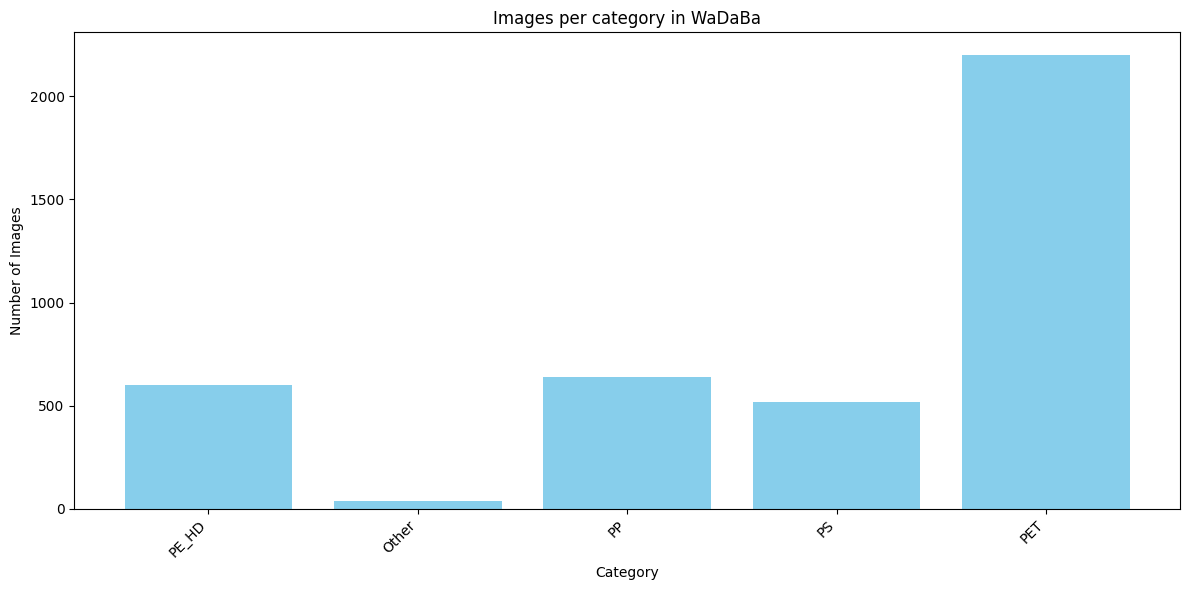

In [2]:
import matplotlib.pyplot as plt

# Define the parent directory containing the inner folders
parent_dir = "/kaggle/working/wadaba"  # Directory where folders are located

# Initialize dictionaries to hold the folder names and their respective image counts
folder_names = []
image_counts = []

# Iterate through each folder in the parent directory
for folder_name in os.listdir(parent_dir):
    folder_path = os.path.join(parent_dir, folder_name)
    if os.path.isdir(folder_path):  # Ensure it's a directory
        # Count the number of .jpg files in the folder
        count = 0
        for filename in os.listdir(folder_path):
            if filename.endswith(".jpg"):  # Ensure it's a .jpg file
                count += 1
        
        # Store the folder name and count
        folder_names.append(folder_name)
        image_counts.append(count)

# Print the counts for debugging
print("Image counts by folder:")
for folder_name, count in zip(folder_names, image_counts):
    print(f"{folder_name}: {count}")

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(folder_names, image_counts, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.title('Images per category in WaDaBa')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot to a file
plt.savefig("image_counts_in_wadaba.png")

# Show the plot
plt.show()